# Duffing Oscillator

The Duffing Oscillator is a model of a driven iron pendulum between two magnets. The model is:

$m\ddot{x} = -\gamma\dot{x} + 2ax - 4bx^3 + F_0\cos{\omega t}$

In this notebook the constants will be taken as:

$m = 1, F_0 = 2, \omega = 2.4, \gamma = 0.1, a = \frac{1}{4}, b = \frac{1}{2}$

### A simple solution

Here the RK4 method is applied to get numerical solutions to the equations.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#constants
m = 1
F_0 = 2
omega = 3     #changed for testing
gamma = 0.1
a = 1/4
b = 1/2

#simulation parameter
h = .01
numberOfRuns = 10**6

#iterator
def iterateRK4(t_n,y_n,f):
    """ 
    Finds y(t_n+h) for the equation dy/dt = f(t,y) via RK4 method.
    """
    k_1 = f(t_n, y_n)
    k_2 = f(t_n + h/2, y_n + h*k_1/2)
    k_3 = f(t_n + h/2, y_n + h*k_2/2)
    k_4 = f(t_n + h, y_n + h*k_3)

    return y_n + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

#f(t,y) function , y = np.array([x,p])
def f(t,R):
    """
    Returns the f(t,R) vector for the duffing oscillator.
    """
    x = R[0]
    p = R[1]
    f_x = p/m
    f_p = -(gamma*p)/m + 2*a*x - 4*b*(x**3) + (F_0)*np.cos(omega*t)
    return np.array([f_x,f_p])

def simulateDuffing(RState):
    """
    Uses RK4 method to find a set of points on the solution to the Lorenz eq given an intial condition.
    """
    RStates = [RState]
    tStates = [0]

    for x in range(numberOfRuns):
        RStates.append(iterateRK4(tStates[-1],RStates[-1],f))
        tStates.append(tStates[-1]+h)
    return tStates, RStates

def transformToXYZ(lst):
    """
    Transfroms [np.array([1,2]),np.array([3,4])] to [[1,3],[2,4]]
    """
    return [[s[c] for s in lst] for c in range(2)]

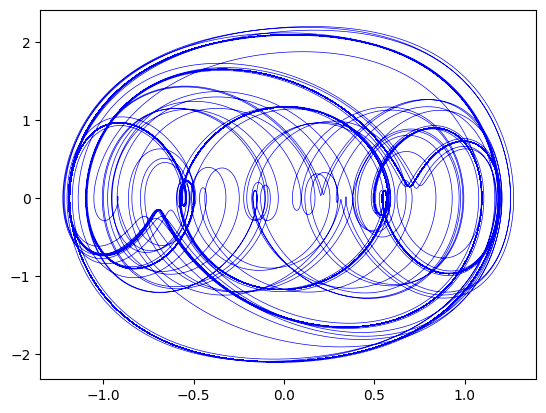

In [23]:
#example simulation
t1, R1 = simulateDuffing(np.array([0.5,0]))
xR1List = transformToXYZ(R1)

#graph
plt.plot(xR1List[0], xR1List[1], 'blue',linewidth = '.5')
plt.xlabel("")
plt.ylabel("")
plt.title(r'')
plt.show()

### Strange Attractor

The set of points $t_0 + \dfrac{2\pi}{\omega}n$ where $n$ is an integer turn out to form a strange attractor.

1194.7431302270013
[[0.8227413472061896, 0.9601672188375553, -0.8553940509592366, 0.08935774155016088, -0.015751280831183396, -0.11118015120584024, -0.1916962531258039, -0.00282652766024649, 0.29156326373863567, -0.7948485339706348, 0.1629356265515904, 0.6826310212520512, -0.6739164157517982, 0.8183956508473472, 1.0450269297984758, -0.7741142518004658, 0.24725747266155457, 1.0893443293908507, -0.4980936138196781, 0.3892808148622836, 0.5505688415924618, -0.7707990928673508, 0.7272552131906455, 1.126499362761449, -0.7399709727717737, 0.16986408873521963, 1.0928658921962155, -0.49837373491371323, 0.3258624480349356, 0.5620153745403836, -0.8322678426454801, 0.6020014156104049, 1.1651943282179524, -0.7226068389506888, 0.07297371065310711, 1.0787170535120736, -0.5021260631831596, 0.257167265232041, 0.5662859414027535, -0.897427011370715, 0.4697058022228578, 1.186810776168719, -0.7091272544928034, -0.029903586414028002, 1.0497741605161766, -0.5113285921681966, 0.18322004228845684, 0.565223186

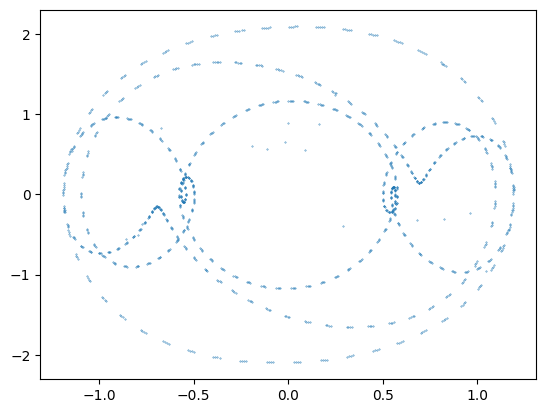

In [24]:
nPeriodic  = int(np.floor(8*np.pi/(omega*h)))
print(numberOfRuns/nPeriodic)

periodicList = []
for i in range(int(np.floor(numberOfRuns/nPeriodic))):
    periodicList.append(R1[i*nPeriodic+ 100])

xR1ListPeriodic = transformToXYZ(periodicList)
print(xR1ListPeriodic)

#plt.plot(t1,R1,'blue',linewidth = '.5')
plt.scatter(xR1ListPeriodic[0],xR1ListPeriodic[1],s=.1)
plt.xlabel("")
plt.ylabel("")
plt.title(r'')
plt.show()
